In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
sns.set()

In [96]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
df_test.head()

,row_id,date,country,store,product
0,26298,2019-01-01,Finland,KaggleMart,Kaggle Mug
1,26299,2019-01-01,Finland,KaggleMart,Kaggle Hat
2,26300,2019-01-01,Finland,KaggleMart,Kaggle Sticker
3,26301,2019-01-01,Finland,KaggleRama,Kaggle Mug
4,26302,2019-01-01,Finland,KaggleRama,Kaggle Hat


In [125]:
def preprocess(ml, train):
    
    df_train = pd.read_csv('train.csv')
    df_test = pd.read_csv('test.csv')
    
    if train :
        data = df_train.copy()
    else :
        data = df_test.copy() 
    
    data['date'] = pd.to_datetime(data['date'])    
#    data['year'] = data['date'].apply(lambda dat : dat.year)
    data['month'] = data['date'].apply(lambda dat : dat.month)
    data['day'] = data['date'].apply(lambda dat : dat.dayofweek)
    
    
    if train :
        data_without_outlier = data[data['num_sold'] < (data['num_sold'].sort_values(ascending=False).quantile(0.98))].reset_index()
        data_without_outlier = pd.get_dummies(columns=['country','store','product','month','day' ], drop_first = True, data = data_without_outlier)
        
        #if ['index','row_id','date'] in data_without_outlier.columns :
        data_without_outlier.drop(columns=['index','row_id'], axis = 1, inplace =True)
        data_without_outlier.drop('date',axis=1, inplace = True)
        
        data_without_outlier.reset_index()
        
        if ml :
            X = data_without_outlier.drop('num_sold', axis = 1)
            y = data_without_outlier['num_sold']
        else :
            X = data_without_outlier.drop('num_sold', axis = 1).values
            y = data_without_outlier['num_sold'].values
        
        X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=101)
        
        return (X_train, X_valid, y_train, y_valid)
        
    else :
        data_without_outlier = data.copy().reset_index()
                
        row_id = data_without_outlier['row_id']
        print(data_without_outlier.info())
        #print(data_without_outlier['year'].unique())
        data_without_outlier = pd.get_dummies(data_without_outlier,columns=['country','store','product','month','day' ], drop_first = True)
        

        data_without_outlier.drop(columns=['index','row_id'], axis = 1, inplace =True)
        
        data_without_outlier.drop('date',axis=1, inplace = True)

        if ml :
            X = data_without_outlier.copy()
        else :
            X = data_without_outlier.copy().values
        return (X, row_id)    

In [126]:
X_train_ml, X_valid_ml, y_train_ml, y_valid_ml = preprocess(ml = 1, train = 1)

In [127]:
X_train_dl, X_valid_dl, y_train_dl, y_valid_dl = preprocess(ml = 0, train = 1)

In [128]:
X_test_ml, row_id_ml = preprocess(ml = 1, train = 0) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6570 entries, 0 to 6569
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   index    6570 non-null   int64         
 1   row_id   6570 non-null   int64         
 2   date     6570 non-null   datetime64[ns]
 3   country  6570 non-null   object        
 4   store    6570 non-null   object        
 5   product  6570 non-null   object        
 6   month    6570 non-null   int64         
 7   day      6570 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 410.8+ KB
None


In [129]:
X_test_ml.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6570 entries, 0 to 6569
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   country_Norway          6570 non-null   uint8
 1   country_Sweden          6570 non-null   uint8
 2   store_KaggleRama        6570 non-null   uint8
 3   product_Kaggle Mug      6570 non-null   uint8
 4   product_Kaggle Sticker  6570 non-null   uint8
 5   month_2                 6570 non-null   uint8
 6   month_3                 6570 non-null   uint8
 7   month_4                 6570 non-null   uint8
 8   month_5                 6570 non-null   uint8
 9   month_6                 6570 non-null   uint8
 10  month_7                 6570 non-null   uint8
 11  month_8                 6570 non-null   uint8
 12  month_9                 6570 non-null   uint8
 13  month_10                6570 non-null   uint8
 14  month_11                6570 non-null   uint8
 15  month_12             

In [130]:
X_test_dl, row_id_dl = preprocess(ml = 0, train = 0) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6570 entries, 0 to 6569
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   index    6570 non-null   int64         
 1   row_id   6570 non-null   int64         
 2   date     6570 non-null   datetime64[ns]
 3   country  6570 non-null   object        
 4   store    6570 non-null   object        
 5   product  6570 non-null   object        
 6   month    6570 non-null   int64         
 7   day      6570 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(3)
memory usage: 410.8+ KB
None


In [131]:
def smape(A, F):
    return 100/len(A) * np.sum(2 * np.abs(F - A) / (np.abs(A) + np.abs(F)))

In [132]:
X_train_ml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20616 entries, 22656 to 13151
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   country_Norway          20616 non-null  uint8
 1   country_Sweden          20616 non-null  uint8
 2   store_KaggleRama        20616 non-null  uint8
 3   product_Kaggle Mug      20616 non-null  uint8
 4   product_Kaggle Sticker  20616 non-null  uint8
 5   month_2                 20616 non-null  uint8
 6   month_3                 20616 non-null  uint8
 7   month_4                 20616 non-null  uint8
 8   month_5                 20616 non-null  uint8
 9   month_6                 20616 non-null  uint8
 10  month_7                 20616 non-null  uint8
 11  month_8                 20616 non-null  uint8
 12  month_9                 20616 non-null  uint8
 13  month_10                20616 non-null  uint8
 14  month_11                20616 non-null  uint8
 15  month_12       

In [133]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train_ml, y_train_ml)
pred_val = lin_model.predict(X_valid_ml)

In [134]:
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error

print("mean_absolute_error : ", mean_absolute_error(y_valid_ml, pred_val))
print("mean_squared_error : ", (mean_squared_error(y_valid_ml, pred_val)))
print("root_mean_squared_error : ", np.sqrt(mean_squared_error(y_valid_ml, pred_val)))
print("SMAPE : ", smape(y_valid_ml, pred_val))

mean_absolute_error :  67.50332363206698
mean_squared_error :  8147.1623226446445
root_mean_squared_error :  90.26163261676938
SMAPE :  28.149631849084887


In [135]:
from sklearn.linear_model import Ridge

lin_model = Ridge()
lin_model.fit(X_train_ml, y_train_ml)
pred_val = lin_model.predict(X_valid_ml)

In [136]:
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error

print("mean_absolute_error : ", mean_absolute_error(y_valid_ml, pred_val))
print("mean_squared_error : ", (mean_squared_error(y_valid_ml, pred_val)))
print("root_mean_squared_error : ", np.sqrt(mean_squared_error(y_valid_ml, pred_val)))
print("SMAPE : ", smape(y_valid_ml, pred_val))

mean_absolute_error :  67.49436023551148
mean_squared_error :  8147.098078861626
root_mean_squared_error :  90.26127674070219
SMAPE :  28.13272120553508


In [137]:
pred_rig = lin_model.predict(X_test_ml)

In [138]:
from sklearn.linear_model import Lasso

lin_model = Lasso()
lin_model.fit(X_train_ml, y_train_ml)
pred_val = lin_model.predict(X_valid_ml)
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error

print("mean_absolute_error : ", mean_absolute_error(y_valid_ml, pred_val))
print("mean_squared_error : ", (mean_squared_error(y_valid_ml, pred_val)))
print("root_mean_squared_error : ", np.sqrt(mean_squared_error(y_valid_ml, pred_val)))
print("SMAPE : ", smape(y_valid_ml, pred_val))

pred_las = lin_model.predict(X_test_ml)

mean_absolute_error :  67.11331347550971
mean_squared_error :  8402.614216590517
root_mean_squared_error :  91.66577451039464
SMAPE :  26.470922097294107


In [139]:
from sklearn.ensemble import RandomForestRegressor

lin_model = RandomForestRegressor(n_estimators=100)
lin_model.fit(X_train_ml, y_train_ml)
pred_val = lin_model.predict(X_valid_ml)
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error

print("mean_absolute_error : ", mean_absolute_error(y_valid_ml, pred_val))
print("mean_squared_error : ", (mean_squared_error(y_valid_ml, pred_val)))
print("root_mean_squared_error : ", np.sqrt(mean_squared_error(y_valid_ml, pred_val)))
print("SMAPE : ", smape(y_valid_ml, pred_val))

pred_rgf = lin_model.predict(X_test_ml)

mean_absolute_error :  36.563616004506756
mean_squared_error :  3519.6141068953334
root_mean_squared_error :  59.32633569415301
SMAPE :  9.86543486613381


In [227]:
import xgboost as xgb

lin_model = xgb.XGBRegressor(
    booster = 'gbtree',                        
    verbosity=0,
    eta = 0.19,
    reg_lambda = 0.99,
    reg_alpha = 180,
    eval_metric = 'rmse',
    gamma = 8.42,
    colsample_bytree = 0.60,
    max_depth = 16,
    min_child_weight = 8
)
lin_model.fit(X_train_ml, y_train_ml)
pred_val = lin_model.predict(X_train_ml)
from sklearn.metrics import max_error, mean_absolute_error, mean_squared_error

print("mean_absolute_error : ", mean_absolute_error(y_train_ml, pred_val))
print("mean_squared_error : ", (mean_squared_error(y_train_ml, pred_val)))
print("root_mean_squared_error : ", np.sqrt(mean_squared_error(y_train_ml, pred_val)))
print("SMAPE : ", smape(y_train_ml, pred_val))
print ('\n\n')
pred_val1 = lin_model.predict(X_valid_ml)
#print("mean_absolute_error : ", mean_absolute_error(y_valid_ml, pred_val1))
#print("mean_squared_error : ", (mean_squared_error(y_valid_ml, pred_val1)))
#print("root_mean_squared_error : ", np.sqrt(mean_squared_error(y_valid_ml, pred_val1)))
print("SMAPE : ", smape(y_valid_ml, pred_val1))

pred_xgb = lin_model.predict(X_test_ml)

mean_absolute_error :  34.12904412939792
mean_squared_error :  3072.1650172516256
root_mean_squared_error :  55.42711445900486
SMAPE :  9.318030909148884



SMAPE :  9.605856267979151


In [226]:
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe

space={'max_depth': hp.quniform("max_depth", 3, 18, 1),
        'gamma': hp.uniform ('gamma', 1,9),
        'reg_alpha' : hp.quniform('reg_alpha', 40,180,1),
        'reg_lambda' : hp.uniform('reg_lambda', 0,1),
        'colsample_bytree' : hp.uniform('colsample_bytree', 0.5,1),
        'min_child_weight' : hp.quniform('min_child_weight', 0, 10, 1),
        'n_estimators': 180,
        'seed': 0
    }

def objective(space):
    clf=xgb.XGBRegressor(
                    n_estimators =space['n_estimators'], max_depth = int(space['max_depth']), gamma = space['gamma'],
                    reg_alpha = int(space['reg_alpha']),min_child_weight=int(space['min_child_weight']),
                    colsample_bytree=int(space['colsample_bytree']))
    
    evaluation = [( X_train_ml, y_train_ml), ( X_valid_ml, y_valid_ml)]
    
    clf.fit(X_train_ml, y_train_ml,
            eval_set=evaluation, eval_metric="rmse",
            early_stopping_rounds=10,verbose=False)
    

    pred = clf.predict(X_valid_ml)
    smape1 = smape(y_valid_ml, pred)
    print ("SCORE:", smape1)
    return {'loss': smape1, 'status': STATUS_OK }

trials = Trials()

best_hyperparams = fmin(fn = objective,
                        space = space,
                        algo = tpe.suggest,
                        max_evals = 100,
                        trials = trials)

print("The best hyperparameters are : ","\n")
print(best_hyperparams)

SCORE:                                                                                                                 
24.107399287292072                                                                                                     
SCORE:                                                                                                                 
24.106358594725844                                                                                                     
SCORE:                                                                                                                 
24.107609633876827                                                                                                     
SCORE:                                                                                                                 
24.106515406631857                                                                                                     
SCORE:                                  

SCORE:                                                                                                                 
24.10391013131601                                                                                                      
SCORE:                                                                                                                 
24.103732434759113                                                                                                     
SCORE:                                                                                                                 
24.104391199090514                                                                                                     
SCORE:                                                                                                                 
24.10754064561897                                                                                                      
SCORE:                                  

SCORE:                                                                                                                 
24.103900216299934                                                                                                     
SCORE:                                                                                                                 
24.10423157454408                                                                                                      
SCORE:                                                                                                                 
24.10592627783639                                                                                                      
SCORE:                                                                                                                 
24.104418988491563                                                                                                     
SCORE:                                  

In [210]:
df_sub_ml = pd.DataFrame(data = row_id_ml, columns = ['row_id'])
df_sub_ml['num_sold'] = pred_log

In [211]:
df_sub_ml.head()

,row_id,num_sold
0,26298,229.829741
1,26299,473.785928
2,26300,57.017130
3,26301,417.810268
4,26302,661.766455


In [212]:
df_sub_ml.to_csv('submission.csv',index = False)

In [214]:
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD

In [243]:
model = Sequential()

# input layer
model.add(Dense(16,  activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(800, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(400, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(200, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.2))

# hidden layer
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.2))

# output layer
model.add(Dense(units=1))



# Compile model
model.compile(loss='mse', optimizer='adam')
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)

In [244]:
model.fit(x=X_train_dl ,y=y_train_dl,
          validation_data=(X_valid_dl ,y_valid_dl),
          batch_size=100,epochs=epochs, verbose = 2, callbacks=[early_stop])

Epoch 1/400
207/207 - 3s - loss: 45607.8125 - val_loss: 9606.3779 - 3s/epoch - 15ms/step
Epoch 2/400
207/207 - 2s - loss: 16449.0762 - val_loss: 6855.7422 - 2s/epoch - 10ms/step
Epoch 3/400
207/207 - 2s - loss: 13275.3867 - val_loss: 5985.1812 - 2s/epoch - 10ms/step
Epoch 4/400
207/207 - 2s - loss: 11867.1211 - val_loss: 10829.5654 - 2s/epoch - 10ms/step
Epoch 5/400
207/207 - 2s - loss: 11174.3926 - val_loss: 5745.8413 - 2s/epoch - 10ms/step
Epoch 6/400
207/207 - 2s - loss: 10497.4062 - val_loss: 10840.7393 - 2s/epoch - 10ms/step
Epoch 7/400
207/207 - 2s - loss: 10146.6025 - val_loss: 8538.2832 - 2s/epoch - 10ms/step
Epoch 8/400
207/207 - 2s - loss: 10116.3496 - val_loss: 7340.9136 - 2s/epoch - 10ms/step
Epoch 9/400
207/207 - 2s - loss: 9715.2471 - val_loss: 8472.6104 - 2s/epoch - 10ms/step
Epoch 10/400
207/207 - 2s - loss: 9402.6846 - val_loss: 6109.5879 - 2s/epoch - 10ms/step
Epoch 11/400
207/207 - 3s - loss: 9351.4238 - val_loss: 7536.3467 - 3s/epoch - 12ms/step
Epoch 12/400
207/207

In [245]:
loss = pd.DataFrame(model.history.history)

In [246]:
loss.head()

,loss,val_loss
0,45607.812500,9606.377930
1,16449.076172,6855.742188
2,13275.386719,5985.181152
3,11867.121094,10829.565430
4,11174.392578,5745.841309


In [248]:
pred_dl = model.predict(X_test_dl)

<AxesSubplot:>

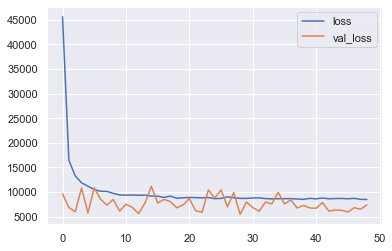

In [247]:
loss.plot()

In [221]:
df_sub_ml = pd.DataFrame(data = row_id_ml, columns = ['row_id'])
df_sub_ml['num_sold'] = pred_xgb
df_sub_ml.head()

,row_id,num_sold
0,26298,227.040192
1,26299,368.751953
2,26300,102.663979
3,26301,385.143616
4,26302,627.458862


In [222]:
df_sub_ml.to_csv('submission.csv',index = False)